In [1]:
import pandas as pd
import openpyxl
import json
import ast
import os
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_csv('csv/final.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_12840\1354750008.py:1: DtypeWarning: Columns (13,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('csv/final.csv')


In [3]:
df.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,NaN,14.0,190mm,bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,16,14.0,190mm,bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,14,14.0,190mm,bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,14,14.0,190mm,bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,16,14.0,190mm,bangalore


In [4]:
df2 = df.copy()

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 75 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   it                        8369 non-null   int64  
 1   ft                        8369 non-null   object 
 2   bt                        8365 non-null   object 
 3   km                        8369 non-null   object 
 4   transmission              8369 non-null   object 
 5   ownerNo                   8369 non-null   int64  
 6   owner                     8369 non-null   object 
 7   oem                       8369 non-null   object 
 8   model                     8369 non-null   object 
 9   modelYear                 8369 non-null   int64  
 10  centralVariantId          8369 non-null   int64  
 11  variantName               8369 non-null   object 
 12  price                     8369 non-null   object 
 13  priceActual               1670 non-null   object 
 14  priceSav

In [6]:
# here i am going to drop some column based on missing value percentage and 
# manually found out not needed columns
 
df3 = df2.drop(['it','priceActual','priceSaving','priceFixedText','Wheel Size','Ground Clearance Unladen','Top Feature','Comfort',
                'Interior','Exterior','Safety','Entertainment','Gross Weight','Cargo Volumn','Alloy Wheel Size','desc','heading',
                'Length','Width','Height','Wheel Base','Front Tread','Rear Tread','Kerb Weight','Gross Weight','Seating Capacity',
                'Cargo Volumn','Wheel Size','Alloy Wheel Size','Values per Cylinder','Value Configuration','Fuel Suppy System',
                'BoreX Stroke','Compression Ratio','centralVariantId','variantName','RTO'], axis = 1)

In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ft                   8369 non-null   object
 1   bt                   8365 non-null   object
 2   km                   8369 non-null   object
 3   transmission         8369 non-null   object
 4   ownerNo              8369 non-null   int64 
 5   owner                8369 non-null   object
 6   oem                  8369 non-null   object
 7   model                8369 non-null   object
 8   modelYear            8369 non-null   int64 
 9   price                8369 non-null   object
 10  imgUrl               8369 non-null   object
 11  Registration Year    8369 non-null   object
 12  Insurance Validity   8369 non-null   object
 13  Fuel Type            8369 non-null   object
 14  Seats                8369 non-null   object
 15  Kms Driven           8369 non-null   object
 16  Owners

In [8]:
null_counts = df3.isnull().sum()
null_counts

ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
owner                    0
oem                      0
model                    0
modelYear                0
price                    0
imgUrl                   0
Registration Year        0
Insurance Validity       0
Fuel Type                0
Seats                    0
Kms Driven               0
Ownership                0
Engine Displacement      0
Transmission             0
Year of Manufacture      0
Mileage                287
Engine                   4
Max Power                0
Torque                  60
Color                    0
Engine Type              0
Displacement             0
Max Torque               0
No of Cylinder           0
Turbo Charger            0
Super Charger            1
Gear Box                 0
Drive Type               0
Steering Type            0
Turning Radius           1
Front Brake Type         0
Rear Brake Type          0
T

In [9]:
df3 = df3.dropna(subset=['bt'])
df3['Mileage'] = df3['Mileage'].str.replace('kmpl', '').str.strip()
df3['Mileage'] = df3['Mileage'].str.replace('km/kg', '').str.strip()
df3['Mileage'] = pd.to_numeric(df3['Mileage'])
df3['Mileage'] = df3['Mileage'].fillna(df3['Mileage'].median())

In [10]:
df3 = df3.drop_duplicates(keep='last')

In [11]:
df3['km'] = pd.to_numeric(df['km'].str.replace(',', ''), errors='raise')

In [12]:
def extract_year(value):
    # Use a regular expression to find a four-digit year
    match = re.search(r'\d{4}', value)
    if match:
        return int(match.group(0))  # Return the matched year
    return 0  # Return None if no year is found

df3['Registration Year'] = df3['Registration Year'].apply(extract_year)

In [13]:
df3['Seats'] = df3['Seats'].str.replace('Seats', '').str.strip().astype(int)

In [14]:
df3['Engine'] = df3['Engine'].str.lower().str.replace(r'cc', '').str.strip()
df3['Engine'] = pd.to_numeric(df3['Engine'], errors='coerce')

In [15]:
df3['Torque'] = df3['Torque'].str.extract('(\d+)', expand=False)
df3['Torque'] = pd.to_numeric(df3['Torque'], errors='raise')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_12840\1126503656.py:1: SyntaxWarning: invalid escape sequence '\d'
  df3['Torque'] = df3['Torque'].str.extract('(\d+)', expand=False)


In [16]:
df3['Super Charger'] = df3['Super Charger'].fillna(df3['Super Charger'].mode())

In [17]:
df3['Turning Radius'] = df3['Turning Radius'].str.extract('(\d+)', expand=False)
df3['Turning Radius'] = pd.to_numeric(df3['Turning Radius'], errors='coerce')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_12840\2809280268.py:1: SyntaxWarning: invalid escape sequence '\d'
  df3['Turning Radius'] = df3['Turning Radius'].str.extract('(\d+)', expand=False)


In [18]:
df3['Top Speed'] = df3['Top Speed'].str.lower().str.replace('kmph', '').str.strip()
df3['Top Speed'] = pd.to_numeric(df3['Top Speed'], errors='coerce')

In [19]:
df3['Acceleration'] = df3['Acceleration'].str.extract('(\d+)', expand=False)
df3['Acceleration'] = pd.to_numeric(df3['Acceleration'], errors='coerce')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_12840\3793836227.py:1: SyntaxWarning: invalid escape sequence '\d'
  df3['Acceleration'] = df3['Acceleration'].str.extract('(\d+)', expand=False)


In [20]:
null_counts = df3.isnull().sum()
null_counts

ft                      0
bt                      0
km                      0
transmission            0
ownerNo                 0
owner                   0
oem                     0
model                   0
modelYear               0
price                   0
imgUrl                  0
Registration Year       0
Insurance Validity      0
Fuel Type               0
Seats                   0
Kms Driven              0
Ownership               0
Engine Displacement     0
Transmission            0
Year of Manufacture     0
Mileage                 0
Engine                  4
Max Power               0
Torque                 60
Color                   0
Engine Type             0
Displacement            0
Max Torque              0
No of Cylinder          0
Turbo Charger           0
Super Charger           1
Gear Box                0
Drive Type              0
Steering Type           0
Turning Radius          1
Front Brake Type        0
Rear Brake Type         0
Top Speed               1
Acceleration

In [21]:
# Drop rows where 'Torque' column has NaN values
df3 = df3.dropna(subset=['Engine'])
df3 = df3.dropna(subset=['Torque'])
df3 = df3.dropna(subset=['Turning Radius'])
df3 = df3.dropna(subset=['Top Speed'])
df3 = df3.dropna(subset=['Acceleration'])


In [22]:
null_counts = df3.isnull().sum()
null_counts

ft                     0
bt                     0
km                     0
transmission           0
ownerNo                0
owner                  0
oem                    0
model                  0
modelYear              0
price                  0
imgUrl                 0
Registration Year      0
Insurance Validity     0
Fuel Type              0
Seats                  0
Kms Driven             0
Ownership              0
Engine Displacement    0
Transmission           0
Year of Manufacture    0
Mileage                0
Engine                 0
Max Power              0
Torque                 0
Color                  0
Engine Type            0
Displacement           0
Max Torque             0
No of Cylinder         0
Turbo Charger          0
Super Charger          0
Gear Box               0
Drive Type             0
Steering Type          0
Turning Radius         0
Front Brake Type       0
Rear Brake Type        0
Top Speed              0
Acceleration           0
Tyre Type              0


In [23]:
df3.head()

,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,price,...,Drive Type,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,City
1,Petrol,SUV,32706,Manual,2,2nd Owner,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,...,FWD,Power,4.0,Disc,Drum,165.0,12.0,Tubeless,5,bangalore
2,Petrol,Hatchback,11949,Manual,1,1st Owner,Tata,Tata Tiago,2018,₹ 5.85 Lakh,...,FWD,Power,4.0,Disc,Drum,165.0,12.0,Tubeless,5,bangalore
3,Petrol,Sedan,17794,Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,...,FWD,Power,4.0,Disc,Drum,165.0,12.0,Tubeless,5,bangalore
4,Diesel,SUV,60000,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,...,FWD,Power,4.0,Disc,Drum,165.0,12.0,Tubeless,5,bangalore
5,Diesel,SUV,20000,Manual,1,1st Owner,Jeep,Jeep Compass,2020,₹ 19 Lakh,...,FWD,Power,4.0,Disc,Drum,165.0,12.0,Tubeless,5,bangalore


In [24]:
df3 = df3.drop('owner', axis=1)
df3 = df3.drop('imgUrl', axis=1)



In [25]:
df3 = df3.drop('Kms Driven', axis=1)

In [26]:
df3 = df3.drop('Engine Displacement', axis=1)


In [27]:
def convert_price(value):
    # Remove ₹ symbol and strip spaces
    value = value.replace('₹', '').replace(',', '').strip()  # Also remove commas if present
    
    # Check for "Lakh" or "crore" and convert accordingly
    if 'Lakh' in value:
        value = value.replace('Lakh', '').strip()
        return float(value) * 100000  # Convert to Lakh
    
    elif 'Crore' in value:
        value = value.replace('Crore', '').strip()
        return float(value) * 10000000  # Convert to crore
    
    return float(value)  # Return as float if no unit (Lakh/crore) is found

# Apply the conversion function to the 'price' column
df3['price'] = df3['price'].apply(convert_price)

In [28]:
df3.to_csv('csv/ready_for_ml.csv')

In [29]:
df4 = df3.copy()

In [30]:
df4['Engine'].unique()

array([1497., 1199., 1197., 1248., 1956., 1198.,  998., 1462., 2179.,
       1950., 1396., 1995., 1498., 4663., 1086., 1991., 1968., 1998.,
       2982., 1461., 1797.,  796., 1353., 2925., 2987., 2967.,  999.,
       1341., 1496., 1582., 1798., 1120., 1969., 1451.,  814., 1999.,
       1591., 1397., 1368., 1598., 3198., 1196., 2993., 2755., 2143.,
       2354., 1332., 2199., 1997., 1499., 2148., 2696., 1364., 1373.,
       1299., 1061., 1493., 2497., 1495., 1590., 1896., 2494., 1330.,
       1781., 1194., 1390., 2953., 1399., 1595., 2496.,    0., 1984.,
       2694., 1298., 2362., 2198., 1599.,  993., 2393., 1389., 1597.,
       2498., 2523., 1586.,  995., 2499., 2998.,   72., 1589.,  624.,
       1596.,  799., 3597., 2184., 1405., 5000., 1422., 1047., 2200.,
       2996., 1108., 2400., 1996., 1395., 1186., 1799., 2999., 1482.,
        793.,  936., 4134., 1796., 1172., 1468., 1193., 2477., 2997.,
       2995., 2487., 1794., 3456., 2360., 3982., 2894., 3346., 3498.,
       2979., 1349.,

In [31]:
numeric_columns = df4.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df4.select_dtypes(include=['object']).columns

In [32]:
numeric_columns , categorical_columns

(Index(['km', 'ownerNo', 'modelYear', 'price', 'Registration Year', 'Seats',
        'Year of Manufacture', 'Mileage', 'Engine', 'Torque', 'Displacement',
        'No of Cylinder', 'Turning Radius', 'Top Speed', 'Acceleration',
        'No Door Numbers'],
       dtype='object'),
 Index(['ft', 'bt', 'transmission', 'oem', 'model', 'Insurance Validity',
        'Fuel Type', 'Ownership', 'Transmission', 'Max Power', 'Color',
        'Engine Type', 'Max Torque', 'Turbo Charger', 'Super Charger',
        'Gear Box', 'Drive Type', 'Steering Type', 'Front Brake Type',
        'Rear Brake Type', 'Tyre Type', 'City'],
       dtype='object'))

In [33]:
# Step 2: Initialize LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_columns:
    df4[col] = label_encoder.fit_transform(df4[col])

# Save the LabelEncoder to a file
with open('label_encoded.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [34]:
df4

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,price,Registration Year,...,Drive Type,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,City
1,4,7,32706,1,2,6,50,2018,811000.0,2018,...,2,1,4.0,0,1,165.0,12.0,1,5,0
2,4,2,11949,1,1,29,267,2018,585000.0,2018,...,2,1,4.0,0,1,165.0,12.0,1,5,0
3,4,8,17794,1,1,9,85,2014,462000.0,2014,...,2,1,4.0,0,1,165.0,12.0,1,5,0
4,1,7,60000,1,1,20,172,2015,790000.0,2015,...,2,1,4.0,0,1,165.0,12.0,1,5,0
5,1,7,20000,1,1,12,99,2020,1900000.0,2020,...,2,1,4.0,0,1,165.0,12.0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,4,2,10000,1,1,20,156,2022,510000.0,2022,...,1,1,5.0,0,1,168.0,14.0,3,5,5
8365,4,2,120000,1,1,20,151,2014,180000.0,2014,...,1,1,5.0,0,1,168.0,14.0,3,5,5
8366,4,8,50000,0,3,21,191,2011,550000.0,2011,...,1,1,5.0,0,1,168.0,14.0,3,5,5
8367,4,2,40000,1,1,20,169,2012,140000.0,2012,...,1,1,5.0,0,1,168.0,14.0,3,5,5


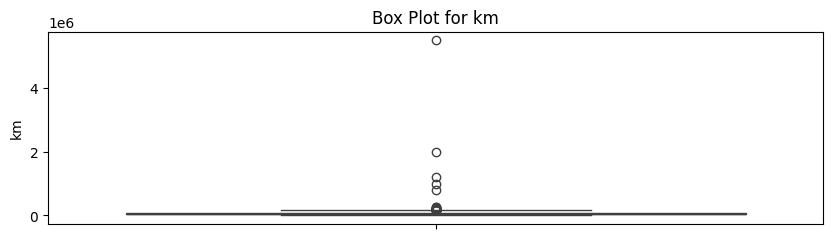

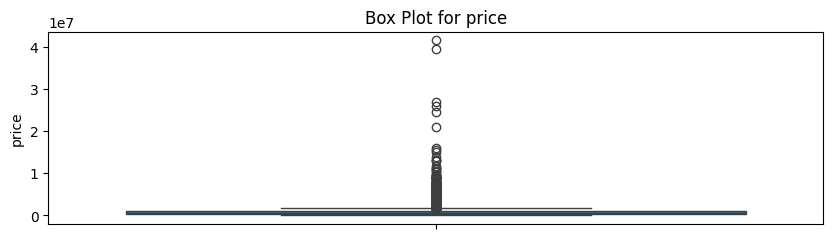

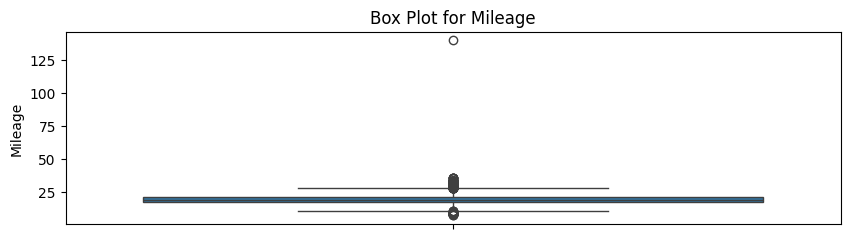

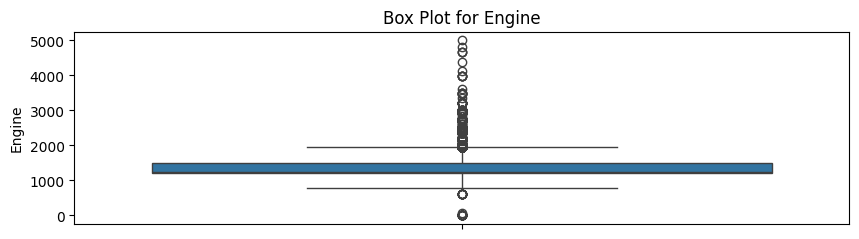

In [35]:
def boxplot_vis(df, col):
    for column in col:
        if column in df.columns:
            plt.figure(figsize=(10, 2.5))
            sns.boxplot(data=df[column])
            plt.title(f'Box Plot for {column}')
            plt.show()
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")

boxplot_vis(df4,['km','price', 'Mileage','Engine'])

In [36]:
def outlier_capping(df, column, new_col):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[new_col] = df[column].clip(lower_threshold, upper_threshold)

outlier_capping(df4, 'km', 'km')
outlier_capping(df4, 'price', 'price')
outlier_capping(df4, 'Mileage', 'Mileage')
outlier_capping(df4, 'Engine', 'Engine')

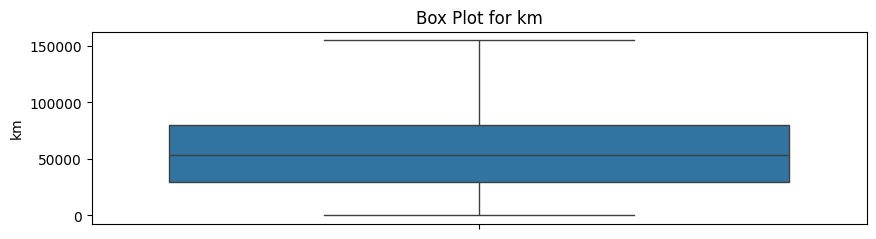

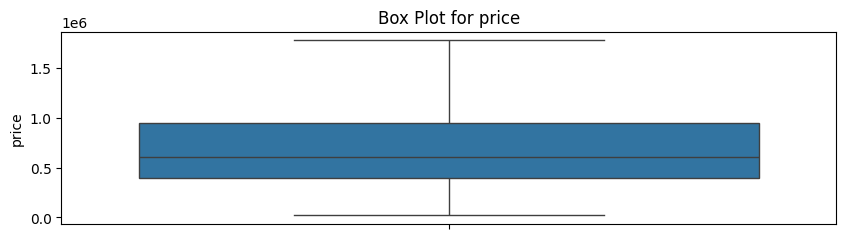

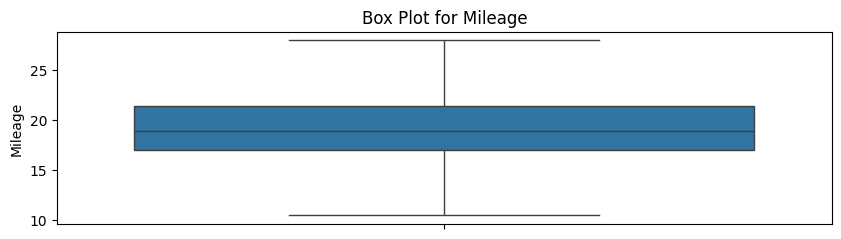

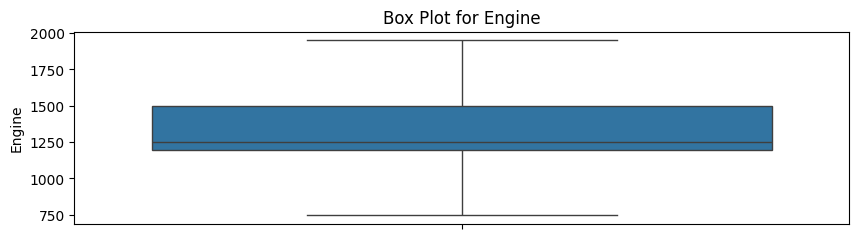

In [37]:
boxplot_vis(df4,['km','price', 'Mileage','Engine'])

In [38]:
# Initialize an empty list to store features with p-values < 0.05
selected_numeric_features = []

# Iterate through each numeric column (excluding 'price' itself)
for col in numeric_columns:
    if col != 'price':  # Skip the 'price' column itself
        # Calculate Pearson correlation and p-value
        corr_value, p_value = stats.pearsonr(df4[col], df4['price'])
        
        # Check if the p-value is less than 0.05
        if p_value < 0.05:
            selected_numeric_features.append(col)

        print(f'PValue for {col} : {p_value}')

# Print the significant features
print("Features with p-value < 0.05:")
print(selected_numeric_features)

PValue for km : 6.392187542934381e-150
PValue for ownerNo : 2.183943507557141e-79
PValue for modelYear : 0.0
PValue for Registration Year : 0.0
PValue for Seats : 2.5993418861032867e-78
PValue for Year of Manufacture : 0.0
PValue for Mileage : 0.0
PValue for Engine : 0.0
PValue for Torque : 0.0
PValue for Displacement : 2.2751985503755956e-05
PValue for No of Cylinder : nan
PValue for Turning Radius : 0.009285187948232554
PValue for Top Speed : 0.6960309698831109
PValue for Acceleration : 1.1434172274952564e-16
PValue for No Door Numbers : 0.0013463838937202066
Features with p-value < 0.05:
['km', 'ownerNo', 'modelYear', 'Registration Year', 'Seats', 'Year of Manufacture', 'Mileage', 'Engine', 'Torque', 'Displacement', 'Turning Radius', 'Acceleration', 'No Door Numbers']


C:\Users\User\AppData\Local\Temp\ipykernel_12840\1094545807.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_value, p_value = stats.pearsonr(df4[col], df4['price'])


In [39]:
import scipy.stats as stats

In [40]:
for each_cat in categorical_columns:
    try:
        groups = [df4['price'][df4[each_cat] == fuel] for fuel in df4[each_cat].unique()]
        _, anova_result = stats.f_oneway(*groups)
        print(f'PValue for {each_cat} : {anova_result}')
    except:
        continue

# # For Transmission
# transmission_groups = [df4['price'][df4['transmission'] == trans] for trans in df4['transmission'].unique()]
# anova_transmission = stats.f_oneway(*transmission_groups)
# print(anova_transmission)

PValue for ft : 2.3815392217121936e-211
PValue for bt : 0.0
PValue for transmission : 0.0
PValue for oem : 0.0
PValue for model : 0.0
PValue for Insurance Validity : 2.280512345571894e-48
PValue for Fuel Type : 2.3815392217121936e-211
PValue for Ownership : 1.4488654824833239e-77
PValue for Transmission : 0.0
PValue for Max Power : 3.1154956061137695e-47
PValue for Color : 9.809597557050637e-43
PValue for Engine Type : 3.1154956061137695e-47
PValue for Max Torque : 3.1154956061137695e-47
PValue for Turbo Charger : 1.8870920207773546e-18
PValue for Gear Box : 1.9166072223423493e-39
PValue for Drive Type : 4.119891987938515e-25
PValue for Steering Type : 1.683600221705435e-19
PValue for Front Brake Type : 0.04470836827019718
PValue for Rear Brake Type : 1.1352968648566428e-22
PValue for Tyre Type : 4.5957437170689384e-42
PValue for City : 3.1154956061137695e-47


In [41]:
import scipy.stats as stats

# Create a dictionary to store p-values for each categorical column
anova_pvalues = {}

for each_cat in categorical_columns:
    try:
        # Perform ANOVA for each categorical column
        groups = [df4['price'][df4[each_cat] == category] for category in df4[each_cat].unique()]
        _, anova_result = stats.f_oneway(*groups)
        
        # Store the p-value in the dictionary
        anova_pvalues[each_cat] = anova_result
    except:
        continue

# Sort the p-values in ascending order
sorted_anova_pvalues = {k: v for k, v in sorted(anova_pvalues.items(), key=lambda item: item[1])}

# Print the sorted p-values
for category, pvalue in sorted_anova_pvalues.items():
    print(f'PValue for {category} : {pvalue}')


PValue for bt : 0.0
PValue for transmission : 0.0
PValue for oem : 0.0
PValue for model : 0.0
PValue for Transmission : 0.0
PValue for ft : 2.3815392217121936e-211
PValue for Fuel Type : 2.3815392217121936e-211
PValue for Ownership : 1.4488654824833239e-77
PValue for Insurance Validity : 2.280512345571894e-48
PValue for Max Power : 3.1154956061137695e-47
PValue for Engine Type : 3.1154956061137695e-47
PValue for Max Torque : 3.1154956061137695e-47
PValue for City : 3.1154956061137695e-47
PValue for Color : 9.809597557050637e-43
PValue for Tyre Type : 4.5957437170689384e-42
PValue for Gear Box : 1.9166072223423493e-39
PValue for Drive Type : 4.119891987938515e-25
PValue for Rear Brake Type : 1.1352968648566428e-22
PValue for Steering Type : 1.683600221705435e-19
PValue for Turbo Charger : 1.8870920207773546e-18
PValue for Front Brake Type : 0.04470836827019718


In [42]:
import scipy.stats as stats

# Create a dictionary to store p-values for each categorical column
anova_pvalues = {}
selected_cat_feature = []
for each_cat in categorical_columns:
    try:
        # Perform ANOVA for each categorical column
        groups = [df4['price'][df4[each_cat] == category] for category in df4[each_cat].unique()]
        _, anova_result = stats.f_oneway(*groups)
        
        # Store the p-value in the dictionary
        anova_pvalues[each_cat] = anova_result
    except:
        continue

# Sort the p-values in ascending order
sorted_anova_pvalues = {k: v for k, v in sorted(anova_pvalues.items(), key=lambda item: item[1])}

# Select the top 5 features with the lowest p-values
top_5_features = list(sorted_anova_pvalues.keys())[:10]

# Print the top 5 features
print("Top 5 features for predicting price based on ANOVA p-values:")
for feature in top_5_features:
    print(f'{feature} : P-Value = {sorted_anova_pvalues[feature]}')
    selected_cat_feature.append(feature)
selected_cat_feature
# Perform feature selection using Recursive Feature Elimination (RFE)   


Top 5 features for predicting price based on ANOVA p-values:
bt : P-Value = 0.0
transmission : P-Value = 0.0
oem : P-Value = 0.0
model : P-Value = 0.0
Transmission : P-Value = 0.0
ft : P-Value = 2.3815392217121936e-211
Fuel Type : P-Value = 2.3815392217121936e-211
Ownership : P-Value = 1.4488654824833239e-77
Insurance Validity : P-Value = 2.280512345571894e-48
Max Power : P-Value = 3.1154956061137695e-47


['bt',
 'transmission',
 'oem',
 'model',
 'Transmission',
 'ft',
 'Fuel Type',
 'Ownership',
 'Insurance Validity',
 'Max Power']

In [43]:
# Feature Selection Bsed on T-test and Anova test

selected_cat_feature
selected_numeric_features

['km',
 'ownerNo',
 'modelYear',
 'Registration Year',
 'Seats',
 'Year of Manufacture',
 'Mileage',
 'Engine',
 'Torque',
 'Displacement',
 'Turning Radius',
 'Acceleration',
 'No Door Numbers']

In [44]:
df_for_ml = selected_cat_feature + selected_numeric_features
df_for_ml = df4[df_for_ml]
df_for_ml[['price', 'city']] = df4[['price', 'City']]
df_for_ml

C:\Users\User\AppData\Local\Temp\ipykernel_12840\2494471374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_ml[['price', 'city']] = df4[['price', 'City']]
C:\Users\User\AppData\Local\Temp\ipykernel_12840\2494471374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_ml[['price', 'city']] = df4[['price', 'City']]


,bt,transmission,oem,model,Transmission,ft,Fuel Type,Ownership,Insurance Validity,Max Power,...,Year of Manufacture,Mileage,Engine,Torque,Displacement,Turning Radius,Acceleration,No Door Numbers,price,city
1,7,1,6,50,1,4,4,3,2,4,...,2018,17.00,1497.0,150.0,1197,4.0,12.0,5,811000.0,0
2,2,1,29,267,1,4,4,1,2,4,...,2018,23.84,1199.0,114.0,1197,4.0,12.0,5,585000.0,0
3,8,1,9,85,1,4,4,1,2,4,...,2014,19.10,1197.0,113.0,1197,4.0,12.0,5,462000.0,0
4,7,1,20,172,1,1,1,1,5,4,...,2015,23.65,1248.0,200.0,1197,4.0,12.0,5,790000.0,0
5,7,1,12,99,1,1,1,1,5,4,...,2020,17.10,1949.5,350.0,1197,4.0,12.0,5,1775000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,2,1,20,156,1,4,4,1,5,1,...,2022,25.24,998.0,89.0,1461,5.0,14.0,5,510000.0,5
8365,2,1,20,151,1,4,4,1,5,1,...,2014,22.74,796.0,69.0,1461,5.0,14.0,5,180000.0,5
8366,8,0,21,191,0,4,4,4,5,1,...,2011,11.74,1796.0,285.0,1461,5.0,14.0,5,550000.0,5
8367,2,1,20,169,1,4,4,1,5,1,...,2012,18.50,1197.0,114.0,1461,5.0,14.0,5,140000.0,5


In [45]:
df_for_ml.columns

Index(['bt', 'transmission', 'oem', 'model', 'Transmission', 'ft', 'Fuel Type',
       'Ownership', 'Insurance Validity', 'Max Power', 'km', 'ownerNo',
       'modelYear', 'Registration Year', 'Seats', 'Year of Manufacture',
       'Mileage', 'Engine', 'Torque', 'Displacement', 'Turning Radius',
       'Acceleration', 'No Door Numbers', 'price', 'city'],
      dtype='object')

In [46]:
df_for_ml = df_for_ml.drop('Transmission', axis=1)
df_for_ml = df_for_ml.drop('Turning Radius', axis=1)
df_for_ml = df_for_ml.drop('Displacement', axis=1)
df_for_ml = df_for_ml.drop('Acceleration', axis=1)
df_for_ml = df_for_ml.drop('Registration Year', axis=1)
df_for_ml = df_for_ml.drop('modelYear', axis=1)

In [47]:
correlation_matrix = df_for_ml.corr()

correlation_matrix

,bt,transmission,oem,model,ft,Fuel Type,Ownership,Insurance Validity,Max Power,km,ownerNo,Seats,Year of Manufacture,Mileage,Engine,Torque,No Door Numbers,price,city
bt,1.000000,-0.254285,-0.090969,-0.072663,-0.306153,-0.306153,-0.043764,-0.003632,0.016722,0.050428,-0.031831,0.095311,0.097328,-0.347943,0.591559,0.480768,-0.011728,0.466463,-0.003860
transmission,-0.254285,1.000000,0.058992,0.041672,0.078827,0.078827,0.031954,0.112679,-0.005332,0.159092,0.039516,0.005607,-0.191488,0.294396,-0.368116,-0.441372,0.022707,-0.557287,0.098685
oem,-0.090969,0.058992,1.000000,0.988621,-0.016063,-0.016063,-0.028023,0.031672,0.004944,0.006679,-0.036586,0.132820,0.093111,0.071940,-0.107132,-0.061317,0.014857,-0.037109,0.001662
model,-0.072663,0.041672,0.988621,1.000000,-0.039099,-0.039099,-0.018734,0.028629,0.003345,0.020079,-0.026497,0.132967,0.075869,0.029659,-0.063167,-0.019907,0.008577,-0.009135,-0.006825
ft,-0.306153,0.078827,-0.016063,-0.039099,1.000000,1.000000,-0.033841,-0.035494,-0.030783,-0.318723,-0.049381,-0.298945,0.066328,-0.090711,-0.519473,-0.605861,-0.020848,-0.305278,-0.016261
Fuel Type,-0.306153,0.078827,-0.016063,-0.039099,1.000000,1.000000,-0.033841,-0.035494,-0.030783,-0.318723,-0.049381,-0.298945,0.066328,-0.090711,-0.519473,-0.605861,-0.020848,-0.305278,-0.016261
Ownership,-0.043764,0.031954,-0.028023,-0.018734,-0.033841,-0.033841,1.000000,0.095983,0.071368,0.243432,0.853365,0.005046,-0.342609,-0.069674,0.029690,-0.025199,0.004967,-0.188521,-0.070315
Insurance Validity,-0.003632,0.112679,0.031672,0.028629,-0.035494,-0.035494,0.095983,1.000000,-0.039984,0.132844,0.120379,0.010443,-0.097600,0.017368,-0.058793,-0.083624,0.098222,-0.132283,0.045993
Max Power,0.016722,-0.005332,0.004944,0.003345,-0.030783,-0.030783,0.071368,-0.039984,1.000000,0.080865,0.108112,0.005727,-0.044772,-0.023196,0.027315,0.018935,0.111456,0.013545,-0.327849
km,0.050428,0.159092,0.006679,0.020079,-0.318723,-0.318723,0.243432,0.132844,0.080865,1.000000,0.269226,0.128964,-0.556414,0.003079,0.139569,0.044686,-0.000919,-0.282260,-0.023600


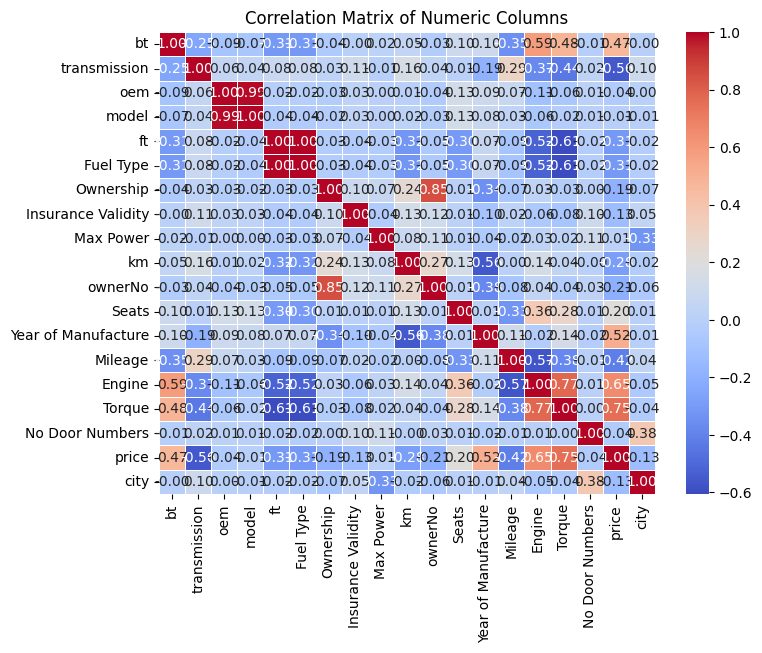

In [48]:
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Add a title
plt.title('Correlation Matrix of Numeric Columns')

# Display the plot
plt.show()

In [49]:
df_for_ml = df_for_ml.drop('model', axis=1)
df_for_ml = df_for_ml.drop('Torque', axis=1)
df_for_ml = df_for_ml.drop('No Door Numbers', axis=1)
df_for_ml = df_for_ml.drop('Max Power', axis=1)
df_for_ml = df_for_ml.drop('Insurance Validity', axis=1)
df_for_ml = df_for_ml.drop('Fuel Type', axis=1)
df_for_ml = df_for_ml.drop('Ownership', axis=1)



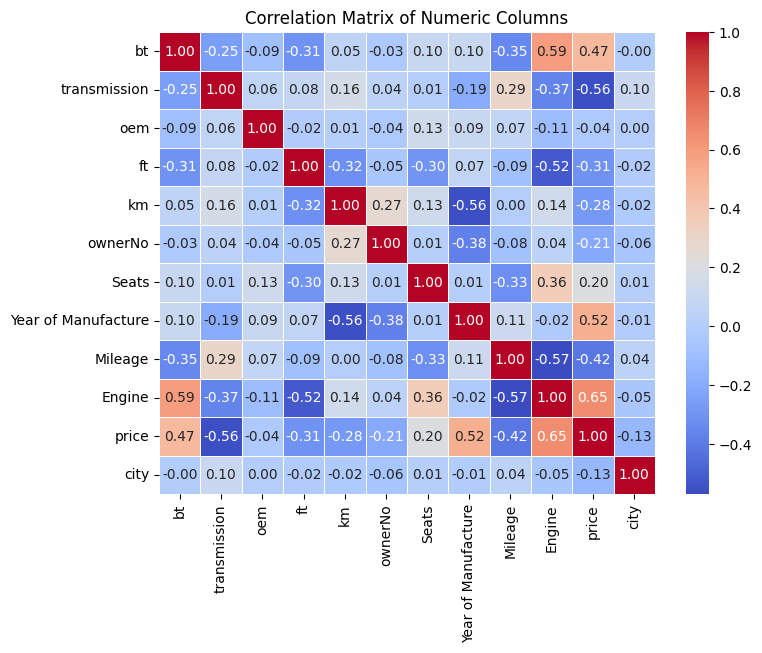

In [50]:
correlation_matrix = df_for_ml.corr()

correlation_matrix

plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Add a title
plt.title('Correlation Matrix of Numeric Columns')

# Display the plot
plt.show()

In [51]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [52]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_for_ml[['km', 'price']] = ss.fit_transform(df_for_ml[['km', 'price']])

# Save the LabelEncoder to a file
with open('standard_scaler.pkl', 'wb') as f:
    pickle.dump(ss, f)



In [53]:
df_for_ml

,bt,transmission,oem,ft,km,ownerNo,Seats,Year of Manufacture,Mileage,Engine,price,city
1,7,1,6,4,-0.735508,2,5,2018,17.00,1497.0,0.118130,0
2,2,1,29,4,-1.352197,1,5,2018,23.84,1199.0,-0.344824,0
3,8,1,9,4,-1.178542,1,5,2014,19.10,1197.0,-0.596785,0
4,7,1,20,1,0.075393,1,5,2015,23.65,1248.0,0.075112,0
5,7,1,12,1,-1.113002,1,5,2020,17.10,1949.5,2.092850,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,2,1,20,4,-1.410101,1,5,2022,25.24,998.0,-0.498458,5
8365,2,1,20,4,1.857986,1,5,2014,22.74,796.0,-1.174452,5
8366,8,0,21,4,-0.221706,3,5,2011,11.74,1796.0,-0.416520,5
8367,2,1,20,4,-0.518805,1,5,2012,18.50,1197.0,-1.256391,5


In [54]:
X = df_for_ml.drop(['price'],axis=1)
Y = df_for_ml['price']

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [56]:
models = [LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, Y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= Y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= Y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= Y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= Y_test, y_pred= pred))

In [57]:
ML_model_df = pd.DataFrame({"Model":[ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', \
                                   'Random Forest Regressor', 'Ridge', 'Lasso'],
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "Explained Variance Score":evs,
                         "R-Sqaure Score(Accuracy)":r_square_score})

ML_model_df.set_index('Model',inplace=True)
ML_model_df

,Mean Squarred Error,Root Mean Squarred Error,Explained Variance Score,R-Sqaure Score(Accuracy)
Model,,,,
Linear Regression,0.208212,0.456302,0.785957,0.785049
Support Vector Rregression,0.594829,0.771252,0.389681,0.385919
Decision Tree Regressor,0.129885,0.360395,0.866257,0.865911
Random Forest Regressor,0.069305,0.263259,0.928725,0.928452
Ridge,0.208215,0.456305,0.785954,0.785046
Lasso,0.381103,0.617336,0.607533,0.606562


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')


c:\Users\User\Desktop\MDT 28\Assignments\Car_Dheko\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
79 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\Desktop\MDT 28\Assignments\Car_Dheko\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\Desktop\MDT 28\Assignments\Car_Dheko\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\User\Desktop\MDT 28\Assignments\Car_Dheko\.venv\Lib\site-packages\sklear

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: -0.0683693563639076


In [61]:
best_rf = grid_search.best_estimator_  # or random_search.best_estimator_
y_pred = best_rf.predict(X_test)

mse1 = mean_squared_error(Y_test, y_pred)
r2_score1 = r2_score(Y_test, y_pred)
print(f'Mean Squared Error: {mse1}')
print(f'R-Sqaure Score(Accuracy): {r2_score1}')


Mean Squared Error: 0.06792774129423894
R-Sqaure Score(Accuracy): 0.9298737120686174
